# Imports

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Funktionen

In [91]:
def plot_scatter(c1: np.ndarray, c2: np.ndarray, c1_label: str, c2_label: str):
    plt.scatter(c1[:, 0], c1[:, 1], label=c1_label)
    plt.scatter(c2[:, 0], c2[:, 1], label=c2_label)
    plt.legend()
    plt.show()

def generate_dataset(c1: np.ndarray, c2: np.ndarray, test_size: float = 0.3):
    x = np.concatenate([c1, c2], axis=0)
    y = np.concatenate([np.zeros(c1.shape[0]), np.ones(c2.shape[0])], axis=0)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    return x, y, x_train, x_test, y_train, y_test

def get_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    prec = cm / cm.sum() * 100
    prec_score = (cm[0, 1] + cm[1, 0]) / cm.sum() * 100
    return cm, prec, prec_score

def plot_cm(prec, title):
    sns.heatmap(prec, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Vorhergesagt')
    plt.ylabel('Wahrer Wert')
    plt.title(title)
    plt.show()

# Aufgabe 2



### Klassifkator implementieren

#### Konstante Einser Spalte hinzufügen/Bias Term
Die zusätzliche Spalte mit konstanten Einsen wird hinzugefügt, um die Berechnung des Bias-Terms zu ermöglichen. Der Bias-Term ist ein zusätzlicher Parameter in einem linearen Modell und stellt den y-Achsenabschnitt der linearen Funktion dar.

Wenn keine konstante Eins-Spalte hinzugefügt wird, ist der y-Achsenabschnitt nicht als eigener Parameter vorhanden, und es ist nicht möglich, den Bias-Term zu optimieren. Der Bias-Term wird dann implizit durch den ersten Eintrag der Gewichte repräsentiert.

Die Zeile x_aug_train = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis=1) fügt daher eine zusätzliche Spalte hinzu, die nur aus Einsen besteht, um den Bias-Term separat von den Gewichten zu behandeln. Die Einsen in der zusätzlichen Spalte stellen sicher, dass die erste Gewichtung dem Bias-Term entspricht.

Die np.ones((x_train.shape[0], 1))-Funktion erzeugt eine Spalte mit Einsen, die dieselbe Anzahl von Zeilen wie die Eingabematrix x_train hat. Durch Verwendung der np.concatenate-Funktion werden diese Einsen an die linken Seite der Eingabematrix angehängt, um eine erweiterte Eingabematrix zu erzeugen, die den Bias-Term enthält.

Der Bias-Term (auch Schwellenwert oder Offset genannt) ist ein zusätzlicher Parameter in linearen Modellen, der den y-Achsenabschnitt der linearen Funktion darstellt. In der linearen Algebra wird der Bias-Term auch als Konstante bezeichnet.

In einfachen Worten kann man den Bias-Term als eine Art Korrekturterm betrachten, der die Vorhersage des Modells anpasst, um eine bessere Passung zu den Daten zu erreichen. Er ist ein wichtiger Parameter in linearen Modellen, weil er es ermöglicht, eine lineare Funktion durch den Ursprung zu verlassen und eine Schräglage zu erzeugen.

Ohne den Bias-Term würde die lineare Funktion immer durch den Ursprung gehen und wäre daher nicht in der Lage, Schräglagen oder andere Arten von Verschiebungen in den Daten zu modellieren. Der Bias-Term wird während des Trainingsprozesses zusammen mit den Gewichten des Modells optimiert, um eine bestmögliche Vorhersageleistung zu erzielen.

#### Features berechnen
In diesem Schritt wird die Designmatrix phi_train erstellt, die alle benötigten polynomiellen Features für das quadratische Polynomklassifikator-Modell enthält.

Die erste Spalte von phi_train enthält die konstante Eins-Spalte, die in Schritt 1 hinzugefügt wurde. Die folgenden Spalten enthalten die quadratischen Terme und Kreuzprodukte der Dimensionen.

Die Schleife durchläuft alle Gradzahlen von 2 bis zum angegebenen degree und fügt jedes Mal eine Spalte hinzu, die die Eingabedaten auf diese Gradzahl potenziert. Durch die schrittweise Erweiterung der Designmatrix um höhere Potenzen wird sichergestellt, dass die Designmatrix alle erforderlichen polynomiellen Features enthält, um eine gut angepasste Entscheidungsgrenze zu lernen.

In diesem Beispiel mit nur zwei Dimensionen kann die Erweiterung auf quadratische Terme vereinfacht werden. Die np.square-Funktion wird verwendet, um die quadratischen Terme der beiden Dimensionen zu berechnen.

Die quadrierten Terme werden hinzugefügt, um die nichtlinearen Aspekte des Modells zu erweitern und sicherzustellen, dass das Modell in der Lage ist, nichtlineare Entscheidungsgrenzen zu modellieren. In der Tat ermöglicht die Verwendung quadratischer Terme, dass das Modell Schräglagen in den Daten modellieren kann.

Bishop, C.M. (2006). Pattern Recognition and Machine Learning. Springer. (Kapitel 3.3.2)

Ein wichtiger Punkt dabei ist, dass das Quadrat einer Zahl immer eine positive Zahl ist. Daher können quadratische Terme in der Tat dazu beitragen, dass das Modell bestimmte Muster und Strukturen in den Daten besser erfasst und in der Lage ist, die Unterschiede zwischen den Klassen zu modellieren.

Insgesamt wird die Designmatrix phi_train aus den ursprünglichen Features, quadratischen Terme und Kreuzprodukte der Dimensionen zusammengesetzt und enthält somit alle erforderlichen polynomiellen Features, um ein quadratisches Polynomklassifikator-Modell zu trainieren.

Die Erstellung der Features erhöht die Anzahl der Spalten von x_aug_train von 3 auf 6, da insgesamt 6 polynomielle Features hinzugefügt werden: die konstante Spalte und 5 weitere Spalten für die quadratischen Terme und Kreuzprodukte der beiden Dimensionen.

Daher hat die Designmatrix phi_train die Dimension (1400, 6), da sie alle Features enthält, die für die Modellierung der Entscheidungsgrenze benötigt werden.

Um dies nochmal konkret zu machen:

Der ursprüngliche Datensatz x_aug_train hat die Form (1400, 3), wobei die erste Spalte alle Einsen enthält.
Für jedes Feature-Paar (z.B. x_1 und x_2) werden in der Designmatrix phi_train 5 neue Spalten hinzugefügt: die quadratischen Terme von x_1 und x_2, die Kreuzterme von x_1 und x_2, und die quadratischen Terme von x_1 und x_2. Insgesamt gibt es 5 solcher Feature-Paare, so dass 5x5 = 25 neue Spalten hinzugefügt werden.
Zusammen mit der ursprünglichen Spalte von Einsen ergibt dies eine Designmatrix phi_train mit der Form (1400, 6).

#### Gewichte berechnen
Im letzten Schritt wird das Modell trainiert, indem die Gewichte w für das quadratische Polynomklassifikator-Modell berechnet werden. Das wird mit der Pseudoinversen der Designmatrix phi_train und den Trainingslabels y_train gemacht:

w = np.dot(np.linalg.pinv(phi_train), y_train)

Die Pseudoinverse ist ein Verfahren, um die Inverse einer Matrix zu berechnen, wenn diese nicht existiert. In diesem Fall wird sie verwendet, um eine Lösung für das lineare Gleichungssystem zu finden, das durch das Modell gegeben ist. Das Gleichungssystem lautet:

phi_train * w = y_train

Das Ziel ist es, die Gewichte w zu finden, die dieses Gleichungssystem erfüllen und es ermöglichen, die Trainingsdaten so gut wie möglich zu klassifizieren.

Die Gewichte w werden mithilfe der np.dot-Funktion berechnet, indem die Pseudoinverse von phi_train mit y_train multipliziert wird. Dies ergibt einen Vektor der Gewichte, der dann für die Vorhersage von neuen Daten verwendet wird.

Insgesamt berechnet dieser Schritt die Gewichte für das Polynomklassifikator-Modell, die die Entscheidungsgrenze zwischen den beiden Klassen modellieren sollen. Die Gewichte werden so ausgewählt, dass sie die Trainingsdaten möglichst gut klassifizieren.

In [92]:
def train_polynomial_classifier(x_train, y_train):
    # Hinzufügen einer konstanten Eins-Spalte zu x_train
    x_aug_train = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis=1)

    # Erstellen der Designmatrix mit allen Features
    phi_train = np.concatenate([x_aug_train, np.square(x_aug_train)], axis=1)
    
    
    
    # Berechnen der Gewichte mithilfe der Pseudoinversen
    w = np.dot(np.linalg.pinv(phi_train), y_train)
    # oer von Hand:
    #w = np.linalg.solve(np.dot(phi_train.T, phi_train), np.dot(phi_train.T, y_train))
    return w

def quadratic_separator(x1, x2, w):
    # w[0]: bias term
    # w[1]: x-Koordinate
    # w[2]: y-Koordinate
    # w[3]: Quadrat der x-Koordinate
    # w[4]: Produkt aus x-Koordinate und y-Koordinate
    # w[5]: Quadrat der y-Koordinate
    return w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x1*x2 + w[5]*x2**2

def predict(x, w, threshold=0.5):
    z = quadratic_separator(x[:,0], x[:,1], w)
    y_pred_class = np.where(z >= threshold, 1, 0)
    return y_pred_class

## 1. Datensatz: Unimodal teilweise überlappend

### Daten erzeugen und plotten

Size Training Data Set 1: 1400
Size Test Data Set 1: 600


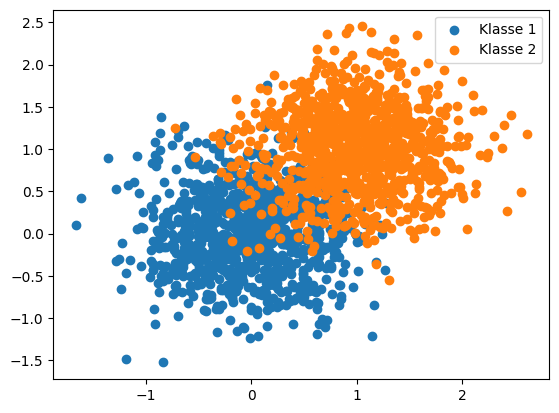

In [93]:
mean1 = [0, 0]
mean2 = [1, 1]
std = 0.5
n = 1000

c1 = np.random.normal(mean1, std, size=(n, 2))
c2 = np.random.normal(mean2, std, size=(n, 2))

x_set1, y_set1, x_train_set1, x_test_set1, y_train_set1, y_test_set1 = generate_dataset(c1=c1, c2=c2, test_size=0.3)

print(f'Size Training Data Set 1: {x_train_set1.shape[0]}')
print(f'Size Test Data Set 1: {x_test_set1.shape[0]}')

plot_scatter(c1=c1, c2=c2, c1_label='Klasse 1', c2_label='Klasse 2')

### Quadratischer Polynom-Klassifikator

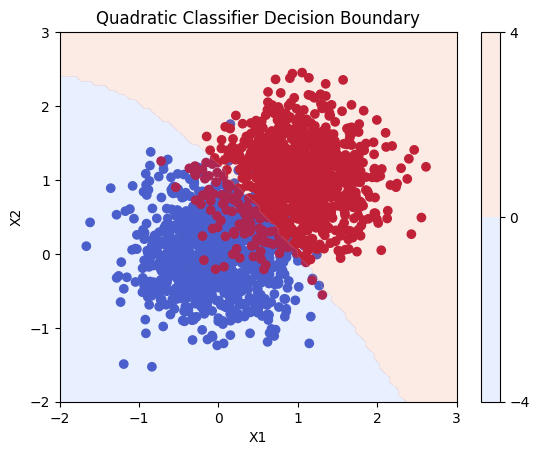

In [94]:
w = train_polynomial_classifier(x_train_set1, y_train_set1)
y_pred = np.round(quadratic_separator(x_test_set1[:, 0], x_test_set1[:, 1], w))

# Definiere Gitterpunkte zum Plotten
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
zz = np.round(quadratic_separator(xx.ravel(), yy.ravel(), w))

# Plotte Datenpunkte
plt.scatter(x_set1[:, 0], x_set1[:, 1], c=y_set1, cmap='coolwarm')

# Plotte Entscheidungsgrenze
plt.contourf(xx, yy, zz.reshape(xx.shape), levels=0, alpha=0.2, cmap='coolwarm')
plt.colorbar()
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Quadratic Classifier Decision Boundary')
plt.show()


### Optimaler Threshold

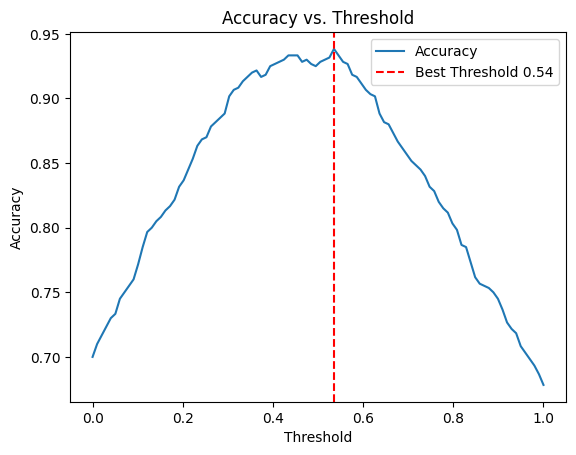

In [95]:
thresholds = np.linspace(0, 1, 100)

# Berechnung der Accuracy für jedes Threshold
accuracies = []
for t in thresholds:
    y_pred = predict(x_test_set1, w, threshold=t)
    accuracies.append(accuracy_score(y_test_set1, y_pred))

# Index des Thresholds mit höchster Accuracy
best_idx = np.argmax(accuracies)
best_threshold = thresholds[best_idx]
best_accuracy = accuracies[best_idx]

# Plotte Accuracy vs. Threshold
plt.plot(thresholds, accuracies, label='Accuracy')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold {round(best_threshold,2)}')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.show()

### Fehlerwahrscheinlichkeit $ P_F $

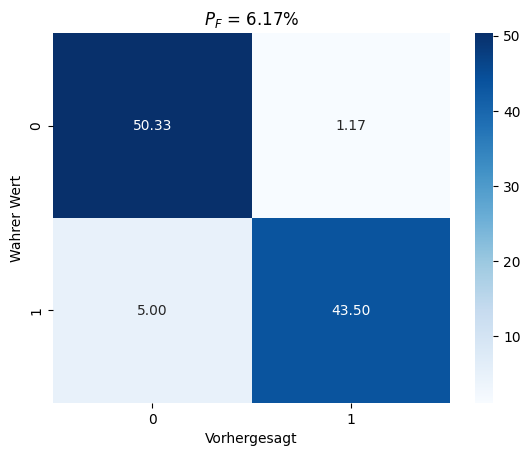

In [96]:
y_pred_set1_m1 = predict(x_test_set1, w, threshold=best_threshold)

cm_set1_m1, cm_set1_m1_prec, pf_set1_m1 = get_cm(y_test_set1, y_pred_set1_m1)
plot_cm(cm_set1_m1_prec, fr'$P_F$ = {pf_set1_m1:.2f}%')

## 2. Datensatz: Eine nicht unimodal verteilte Klasse

### Daten erzeugen und plotten

Size Training Data Set 2: 1400
Size Test Data Set 2: 600


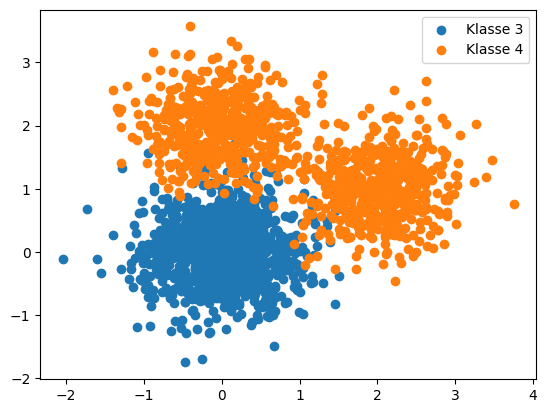

In [97]:
mean3 = [0, 0]

mean4_1 = [2, 1]
mean4_2 = [0, 2]

std = 0.5
n = 1000

c3 = np.random.normal(mean3, std, size=(n, 2))
class4_1 = np.random.normal(mean4_1, std, size=(int(n/2), 2))
class4_2 = np.random.normal(mean4_2, std, size=(int(n/2), 2))

c4 = np.concatenate([class4_1, class4_2], axis=0)

x_set2, y_set2, x_train_set2, x_test_set2, y_train_set2, y_test_set2 = generate_dataset(c1=c3, c2=c4, test_size=0.3)

print(f'Size Training Data Set 2: {x_train_set2.shape[0]}')
print(f'Size Test Data Set 2: {x_test_set2.shape[0]}')

plot_scatter(c1=c3, c2=c4, c1_label='Klasse 3', c2_label='Klasse 4')


### Quadratischer Polynom-Klassifikator

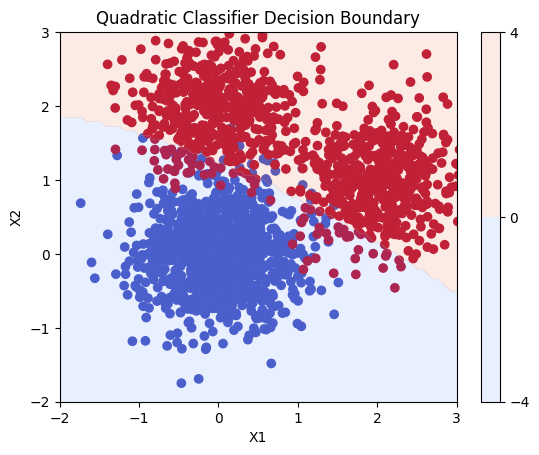

In [98]:
w = train_polynomial_classifier(x_train_set2, y_train_set2)
y_pred = np.round(quadratic_separator(x_test_set2[:, 0], x_test_set2[:, 1], w))

# Definiere Gitterpunkte zum Plotten
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
zz = np.round(quadratic_separator(xx.ravel(), yy.ravel(), w))

# Plotte Datenpunkte
plt.scatter(x_set2[:, 0], x_set2[:, 1], c=y_set2, cmap='coolwarm')

# Plotte Entscheidungsgrenze
plt.contourf(xx, yy, zz.reshape(xx.shape), levels=0, alpha=0.2, cmap='coolwarm')
plt.colorbar()
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Quadratic Classifier Decision Boundary')
plt.show()

### Optimaler Threshold

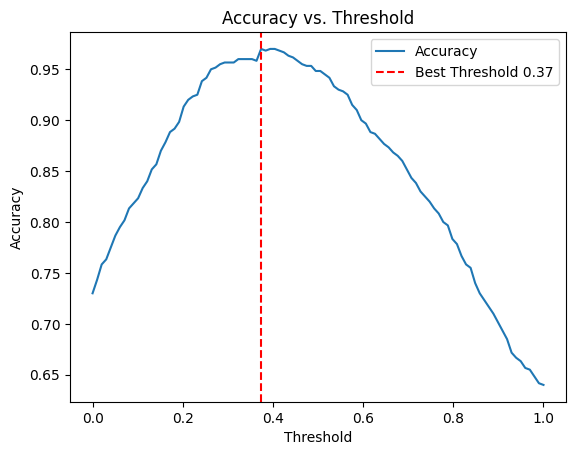

In [99]:
thresholds = np.linspace(0, 1, 100)

# Berechnung der Accuracy für jedes Threshold
accuracies = []
for t in thresholds:
    y_pred = predict(x_test_set2, w, threshold=t)
    accuracies.append(accuracy_score(y_test_set2, y_pred))

# Index des Thresholds mit höchster Accuracy
best_idx = np.argmax(accuracies)
best_threshold = thresholds[best_idx]
best_accuracy = accuracies[best_idx]

# Plotte Accuracy vs. Threshold
plt.plot(thresholds, accuracies, label='Accuracy')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold {round(best_threshold,2)}')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.show()

### Fehlerwahrscheinlichkeit $ P_F $

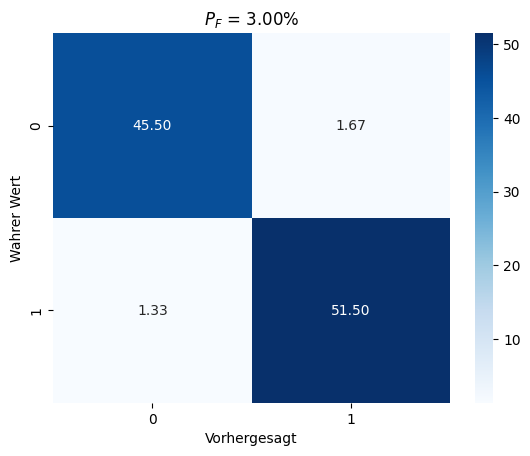

In [100]:
y_pred_set2_m1 = predict(x_test_set2, w, threshold=best_threshold)

cm_set2_m1, cm_set2_m1_prec, pf_set2_m1 = get_cm(y_test_set2, y_pred_set2_m1)
plot_cm(cm_set2_m1_prec, fr'$P_F$ = {pf_set2_m1:.2f}%')

# Aufgabe 3

## 1. Datensatz: Unimodal teilweise überlappend

### Logistische Regression

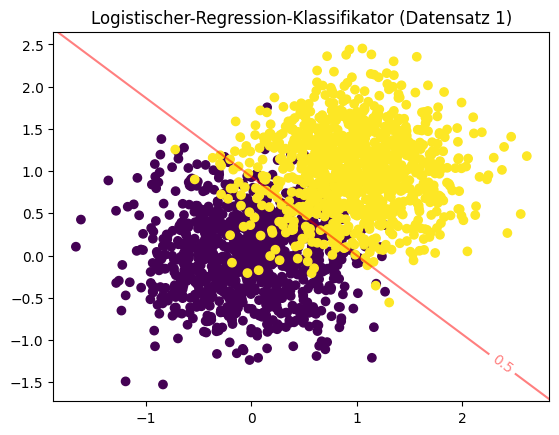

In [101]:
clf1 = LogisticRegression()
clf1.fit(x_train_set1, y_train_set1)

plt.figure()
plt.scatter(x_set1[:, 0], x_set1[:, 1], c=y_set1)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf1.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 1)')
plt.show()

### Fehlerwahrscheinlichkeit $ P_F $

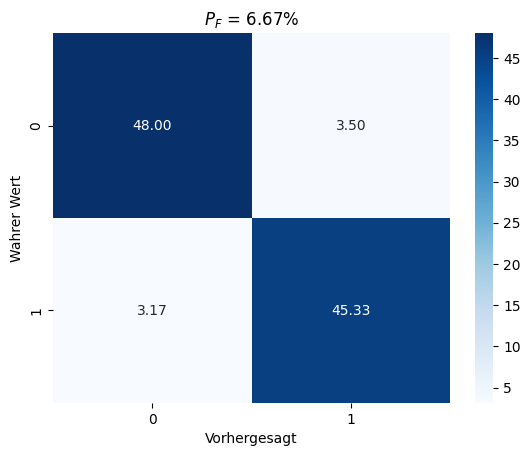

In [102]:
y_pred_set1_m2 = clf1.predict(x_test_set1)

cm_set1_m2, cm_set1_m2_prec, pf_set1_m2 = get_cm(y_test_set1, y_pred_set1_m2)

plot_cm(cm_set1_m2_prec, fr'$P_F$ = {pf_set1_m2:.2f}%')

### Logistische Regression mit quadratisch nichlinearer Transformation

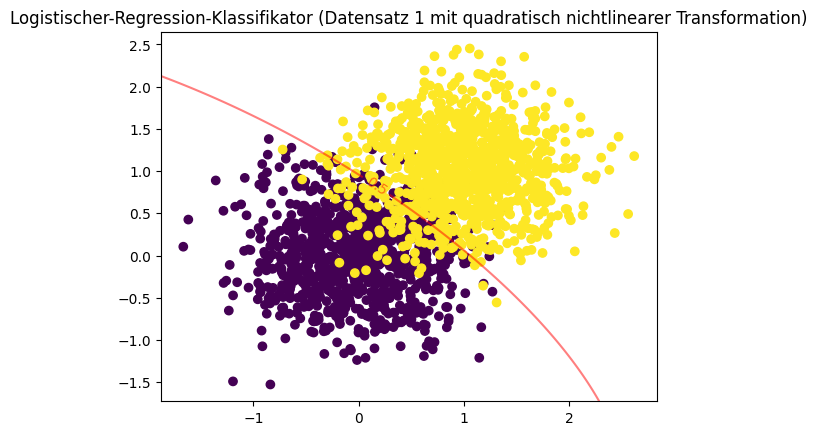

In [103]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_set1_transformed = poly.fit_transform(np.vstack([c1, c2]))

x_train_set1, x_test_set1, y_train_set1, y_test_set1 = train_test_split(x_set1_transformed, y_set1, test_size=0.3)

clf1 = LogisticRegression()
clf1.fit(x_train_set1, y_train_set1)

plt.figure()
plt.scatter(x_set1_transformed[:, 0], x_set1_transformed[:, 1], c=y_set1)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
xy_transformed = poly.transform(xy)
Z = clf1.predict_proba(xy_transformed)[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 1 mit quadratisch nichtlinearer Transformation)')
plt.show()

### Fehlerwahrscheinlichkeit $P_F$

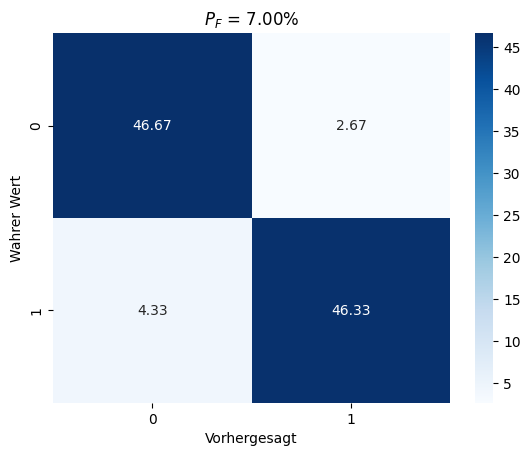

In [104]:
y_pred_set1_m3 = clf1.predict(x_test_set1)

cm_set1_m3, cm_set1_m3_prec, pf_set1_m3 = get_cm(y_test_set1, y_pred_set1_m3)

plot_cm(cm_set1_m3_prec, fr'$P_F$ = {pf_set1_m3:.2f}%')

## 2. Datensatz: Eine nicht unimodal verteilte Klasse

### Logistische Regression

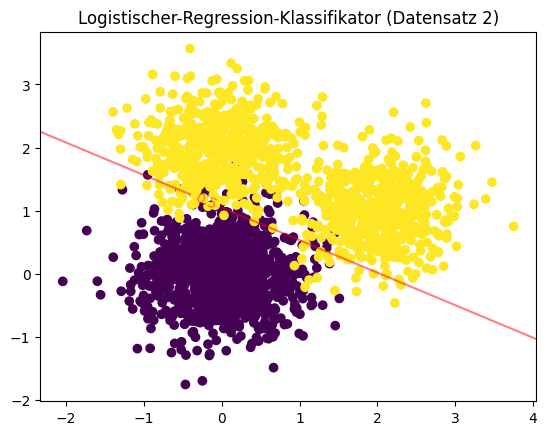

In [105]:
clf2 = LogisticRegression()
clf2.fit(x_train_set2, y_train_set2)

plt.figure()
plt.scatter(x_set2[:, 0], x_set2[:, 1], c=y_set2)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 2)')
plt.show()

### Fehlerwahrscheinlichkeit $ P_F $

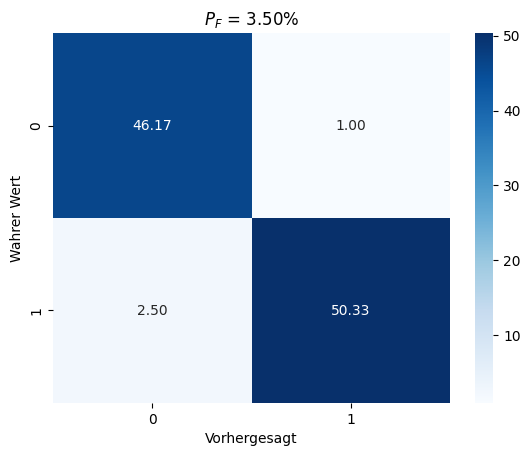

In [106]:
y_pred_set2_m2 = clf2.predict(x_test_set2)

cm_set2_m2, cm_set2_m2_prec, pf_set2_m2 = get_cm(y_test_set2, y_pred_set2_m2)

plot_cm(cm_set2_m2_prec, fr'$P_F$ = {pf_set2_m2:.2f}%')

### Logistische Regression mit quadratisch nichlinearer Transformation

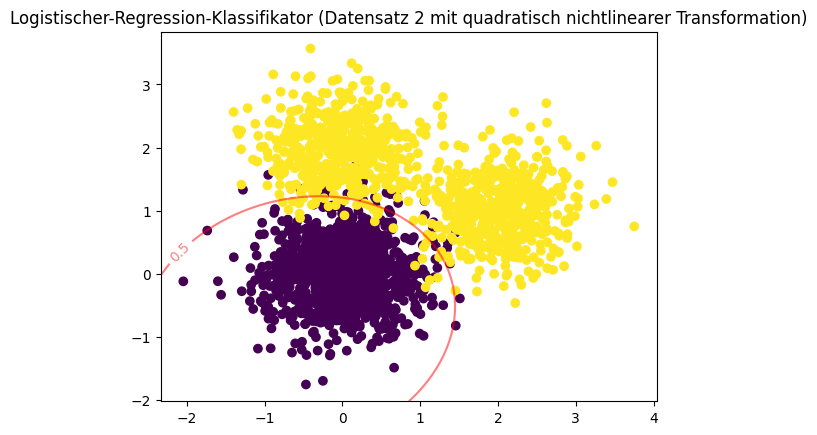

In [107]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_set2_transformed = poly.fit_transform(np.vstack([c3, c4]))

x_train_set2, x_test_set2, y_train_set2, y_test_set2 = train_test_split(x_set2_transformed, y_set2, test_size=0.3)

clf2 = LogisticRegression()
clf2.fit(x_train_set2, y_train_set2)

plt.figure()
plt.scatter(x_set2_transformed[:, 0], x_set2_transformed[:, 1], c=y_set2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
xy_transformed = poly.transform(xy)
Z = clf2.predict_proba(xy_transformed)[:, 1]
Z = Z.reshape(xx.shape)

cs = ax.contour(xx, yy, Z, levels=[0.5], colors='red', alpha=0.5)
ax.clabel(cs, inline=1, fontsize=10)

plt.title('Logistischer-Regression-Klassifikator (Datensatz 2 mit quadratisch nichtlinearer Transformation)')
plt.show()

### Fehlerwahrscheinlihckeit $P_F$

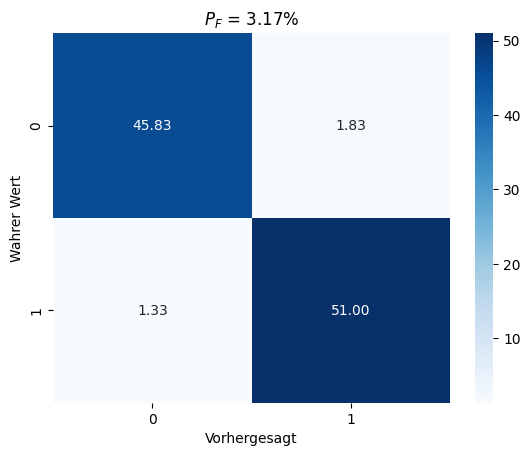

In [108]:
y_pred_set2_m3 = clf2.predict(x_test_set2)

cm_set2_m3, cm_set2_m3_prec, pf_set2_m3 = get_cm(y_test_set2, y_pred_set2_m3)

plot_cm(cm_set2_m3_prec, fr'$P_F$ = {pf_set2_m3:.2f}%')

## Wie werden die Parameter über eine Optimierung bestimmt?

Die Parameter einer logistischen Regression werden über eine Optimierung bestimmt, indem die negativ logarithmierte Likelihood-Funktion numerisch minimiert wird.

Dies geschieht in der Regel mit Hilfe von Optimierungsalgorithmen, die den Gradienten der Funktion nutzen, um die Richtung der Parameteraktualisierung zu bestimmen. Ein weit verbreiteter Algorithmus ist zum Beispiel der Gradientenabstieg. Dabei wird ein Anfangswert für die Parameter festgelegt und iterativ so angepasst, dass die negativ logarithmierte Likelihood-Funktion minimiert wird. Die Iterationen werden fortgesetzt, bis ein Abbruchkriterium erreicht ist oder eine vorgegebene Anzahl von Iterationen durchgeführt wurde.

Ziel ist es, die Parameter so zu bestimmen, dass die Wahrscheinlichkeit, die beobachteten Daten zu erklären, maximiert wird. Dies bedeutet, dass das Modell in der Lage ist, die Beziehung zwischen den Eingangsdaten und den Zielvariablen so gut wie möglich zu modellieren und damit eine Vorhersage für neue, unbekannte Datenpunkte machen kann.

## Vergleich der Modelle

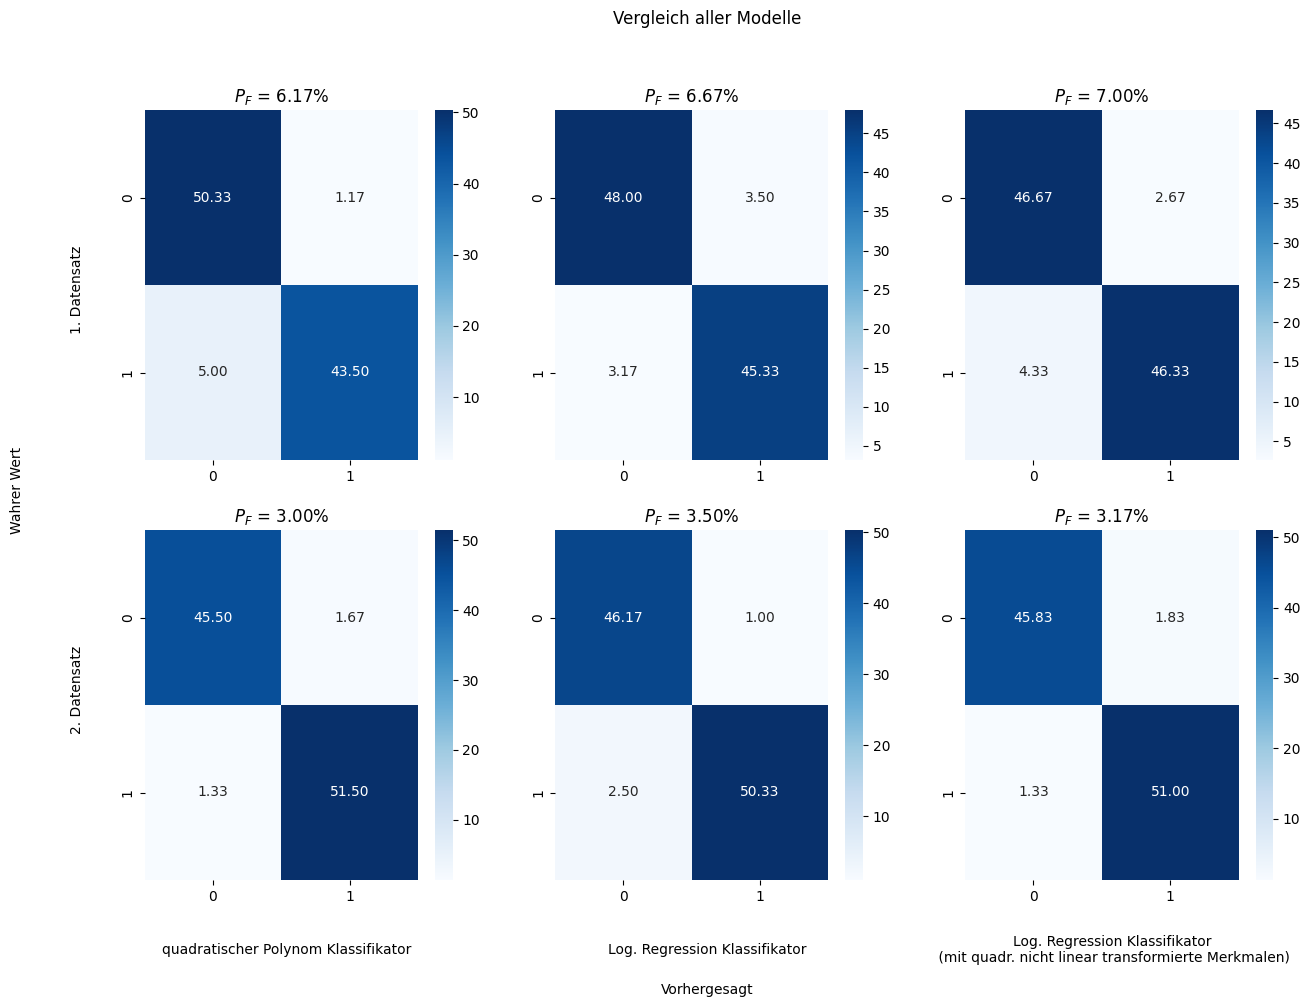

In [112]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.heatmap(cm_set1_m1_prec, annot=True, fmt='.2f', cmap='Blues', ax=ax[0, 0])
ax[0,0].set_title(fr'$P_F$ = {pf_set1_m1:.2f}%')

sns.heatmap(cm_set1_m2_prec, annot=True, fmt='.2f', cmap='Blues', ax=ax[0, 1])
ax[0,1].set_title(fr'$P_F$ = {pf_set1_m2:.2f}%')

sns.heatmap(cm_set1_m3_prec, annot=True, fmt='.2f', cmap='Blues', ax=ax[0, 2])
ax[0,2].set_title(fr'$P_F$ = {pf_set1_m3:.2f}%')

sns.heatmap(cm_set2_m1_prec, annot=True, fmt='.2f', cmap='Blues', ax=ax[1, 0])
ax[1,0].set_title(fr'$P_F$ = {pf_set2_m1:.2f}%')

sns.heatmap(cm_set2_m2_prec, annot=True, fmt='.2f', cmap='Blues', ax=ax[1, 1])
ax[1,1].set_title(fr'$P_F$ = {pf_set2_m2:.2f}%')

sns.heatmap(cm_set2_m3_prec, annot=True, fmt='.2f', cmap='Blues', ax=ax[1, 2])
ax[1,2].set_title(fr'$P_F$ = {pf_set2_m3:.2f}%')

fig.suptitle('Vergleich aller Modelle')

fig.text(0.5, 0, 'Vorhergesagt', ha='center', va='center')

fig.text(0.22, 0.04, 'quadratischer Polynom Klassifikator', ha='center', va='center')
fig.text(0.5, 0.04, 'Log. Regression Klassifikator', ha='center', va='center')
fig.text(0.77, 0.04, 'Log. Regression Klassifikator\n (mit quadr. nicht linear transformierte Merkmalen)', ha='center', va='center')

fig.text(0.04, 0.5, 'Wahrer Wert', ha='center', va='center', rotation='vertical')
fig.text(0.08, 0.3, '2. Datensatz', ha='center', va='center', rotation='vertical')
fig.text(0.08, 0.7, '1. Datensatz', ha='center', va='center', rotation='vertical')

plt.show()